In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
# load the dataset
# keep data.csv and this notebook in the same location or change the dataset path.
df = pd.read_csv('data.csv')

In [3]:
# check number of unique values for each column
df.nunique()

Chromosome                       162
Start                          19057
Stop                           19065
Strand                             2
Gene Symbol                    19107
gene_biotype                      15
gene_name                      12642
gene_source                        2
tag                                2
transcript_biotype                15
transcript_source                  2
GC-JN-9178-12-IC_S13            3020
GC-JN-9178-9-OC_S10             1937
GC-JN-9178-9-R_S6               3016
GC-JN-9178-Ctrl-IC_S8           3513
GC-JN-9178-12-R_S5              3376
GC-JN-9178-13-R_S11             3011
GC-JN-9178-13-OC_S3             3489
GC-JN-9178-Ctrl-OC_S9           3749
GC-JN-9178-13-IC_S7             3008
GC-JN-9178-11-R_S4              3648
GC-JN-9178-10-R_S15             3065
GC-JN-9178-11-OC_S17            2786
GC-JN-9178-10-OC_S2             3193
GC-JN-9178-9-IC_S12             3528
GC-JN-9178-11-IC_S16            2609
GC-JN-9178-12-OC_S14            3491
G

In [4]:
# check data types
df.dtypes

Chromosome                      object
Start                            int64
Stop                             int64
Strand                          object
Gene Symbol                     object
gene_biotype                    object
gene_name                       object
gene_source                     object
tag                             object
transcript_biotype              object
transcript_source               object
GC-JN-9178-12-IC_S13           float64
GC-JN-9178-9-OC_S10            float64
GC-JN-9178-9-R_S6              float64
GC-JN-9178-Ctrl-IC_S8          float64
GC-JN-9178-12-R_S5             float64
GC-JN-9178-13-R_S11            float64
GC-JN-9178-13-OC_S3            float64
GC-JN-9178-Ctrl-OC_S9          float64
GC-JN-9178-13-IC_S7            float64
GC-JN-9178-11-R_S4             float64
GC-JN-9178-10-R_S15            float64
GC-JN-9178-11-OC_S17           float64
GC-JN-9178-10-OC_S2            float64
GC-JN-9178-9-IC_S12            float64
GC-JN-9178-11-IC_S16     

In [5]:
# select categorical column so that we can modify it as numeric
df.select_dtypes(include='object').columns

Index(['Chromosome', 'Strand', 'Gene Symbol', 'gene_biotype', 'gene_name',
       'gene_source', 'tag', 'transcript_biotype', 'transcript_source'],
      dtype='object')

In [6]:
# drop missing rows
df.dropna(inplace=True)

In [7]:
# Convert categorical data to numeric one

df['Strand'] = df['Strand'].replace(['+','-'],[1,0])
df['tag'] = df['tag'].replace(['---','seleno'],[1,0])
df['gene_source'] = df['gene_source'].replace(['ensembl','RefSeq'],[1,0])
df['transcript_source'] = df['transcript_source'].replace(['ensembl','RefSeq'],[1,0])
df['transcript_biotype'] = df['transcript_biotype'].replace(df['transcript_biotype'].unique(),range(len(df['transcript_biotype'].unique())))
df['gene_biotype'] = df['gene_biotype'].replace(df['gene_biotype'].unique(),range(len(df['gene_biotype'].unique())))
df['Chromosome'] = df['Chromosome'].replace(df['Chromosome'].unique(),range(len(df['Chromosome'].unique())))

# Delete unwanted columns
df.drop('Gene Symbol',axis=1,inplace=True)
df.drop('gene_name',axis=1,inplace=True)
df.drop('Start',axis=1,inplace=True)
df.drop('Stop',axis=1,inplace=True)

In [8]:
# check the data type again
df.dtypes

Chromosome                       int64
Strand                           int64
gene_biotype                     int64
gene_source                      int64
tag                              int64
transcript_biotype               int64
transcript_source                int64
GC-JN-9178-12-IC_S13           float64
GC-JN-9178-9-OC_S10            float64
GC-JN-9178-9-R_S6              float64
GC-JN-9178-Ctrl-IC_S8          float64
GC-JN-9178-12-R_S5             float64
GC-JN-9178-13-R_S11            float64
GC-JN-9178-13-OC_S3            float64
GC-JN-9178-Ctrl-OC_S9          float64
GC-JN-9178-13-IC_S7            float64
GC-JN-9178-11-R_S4             float64
GC-JN-9178-10-R_S15            float64
GC-JN-9178-11-OC_S17           float64
GC-JN-9178-10-OC_S2            float64
GC-JN-9178-9-IC_S12            float64
GC-JN-9178-11-IC_S16           float64
GC-JN-9178-12-OC_S14           float64
GC-JN-9178-10-IC_S1            float64
BLGCSEQ0192-RNAControl1_S18    float64
BLGCSEQ0192-RNAControl3_S

In [9]:
# display the dataframe again.
df

,Chromosome,Strand,gene_biotype,gene_source,tag,transcript_biotype,transcript_source,GC-JN-9178-12-IC_S13,GC-JN-9178-9-OC_S10,GC-JN-9178-9-R_S6,...,GC-JN-9178-10-R_S15,GC-JN-9178-11-OC_S17,GC-JN-9178-10-OC_S2,GC-JN-9178-9-IC_S12,GC-JN-9178-11-IC_S16,GC-JN-9178-12-OC_S14,GC-JN-9178-10-IC_S1,BLGCSEQ0192-RNAControl1_S18,BLGCSEQ0192-RNAControl3_S20,BLGCSEQ0192-RNAControl2_S19
0,0,1,0,1,1,0,1,180722.00000,50582.100,339455.00000,...,141996.00000,54700.9,387561.00000,241846.00000,56451.0,208340.00,380305.00000,7947.01,10492.0,10051.0
1,1,1,1,1,1,1,1,1267.99000,430.999,1128.00000,...,737.00000,1907.0,611.00000,1036.01000,679.0,2414.04,145.00000,2.00,5.0,6.0
2,1,0,1,1,1,1,1,13.00000,5.000,4.00000,...,0.00000,9.0,4.00000,12.00000,0.0,13.00,1.00000,0.00,0.0,0.0
3,1,1,1,1,1,1,1,270.00000,77.000,342.00000,...,265.00000,175.0,412.00000,413.99900,225.0,337.00,259.00000,0.00,0.0,1.0
4,1,0,1,1,1,1,1,6.00000,6.000,9.00000,...,6.00000,3.0,9.00000,5.00000,9.0,7.00,9.00000,0.00,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19102,13,0,1,1,1,1,1,149.00000,44.000,105.00000,...,200.00000,91.0,146.00000,272.00000,123.0,244.00,118.00000,11.00,8.0,8.0
19103,8,1,1,1,1,1,1,160.00000,65.000,240.00000,...,303.00000,183.0,290.00000,272.00000,100.0,289.00,485.00000,16.00,16.0,26.0
19104,3,0,10,1,1,10,1,1.00253,0.000,3.00935,...,2.00458,0.0,1.00359,1.00406,0.0,0.00,2.00619,0.00,0.0,0.0
19105,7,0,10,1,1,10,1,2.00000,0.000,0.00000,...,4.00000,1.0,0.00000,0.00000,0.0,0.00,2.00000,0.00,0.0,0.0


In [10]:
# get dataframe as nd-array
X = df.values

In [11]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [12]:
# check for shape
X.shape

(19107, 27)

Hierarchical Clustering
Number of clusters = 7
Classifying the points into clusters:
[6 0 0 ... 2 2 2]


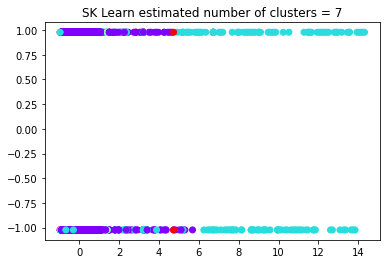

In [13]:
print('='*25)
print("Hierarchical Clustering")
print('='*25)

data = X 

# Displaying dendogram will take huge time as number of rows is aprx 19K 
# hence it has been commented.

# dendrogram
# plt.figure(figsize=(10, 7))
# plt.title("Dendograms")
# dend = shc.dendrogram(shc.linkage(data, method='ward'))
# plt.show()


# Initialize hiererchial clustering method, in order for the algorithm to determine the number of clusters
# put n_clusters=None, compute_full_tree = True,
# best distance threshold value for this dataset is distance_threshold = 200
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=200)

# Cluster the data
cluster.fit_predict(data)

print(f"Number of clusters = {1+np.amax(cluster.labels_)}")

# Display the clustering, assigning cluster label to every datapoint 
print("Classifying the points into clusters:")
print(cluster.labels_)

# Display the clustering graphically in a plot
plt.scatter(data[:,0],data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(cluster.labels_)}")
plt.show()

print(" ")

In [14]:
# Create a new column called 'Cluster' containing Cluster number
df['Cluster'] = cluster.labels_

In [15]:
# check the last column Cluster number is assigned against each row
df.head(20)

,Chromosome,Strand,gene_biotype,gene_source,tag,transcript_biotype,transcript_source,GC-JN-9178-12-IC_S13,GC-JN-9178-9-OC_S10,GC-JN-9178-9-R_S6,...,GC-JN-9178-11-OC_S17,GC-JN-9178-10-OC_S2,GC-JN-9178-9-IC_S12,GC-JN-9178-11-IC_S16,GC-JN-9178-12-OC_S14,GC-JN-9178-10-IC_S1,BLGCSEQ0192-RNAControl1_S18,BLGCSEQ0192-RNAControl3_S20,BLGCSEQ0192-RNAControl2_S19,Cluster
0,0,1,0,1,1,0,1,180722.00,50582.100,339455.0,...,54700.9,387561.0000,241846.000,56451.0,208340.00,380305.0000,7947.01,10492.0,10051.0,6
1,1,1,1,1,1,1,1,1267.99,430.999,1128.0,...,1907.0,611.0000,1036.010,679.0,2414.04,145.0000,2.00,5.0,6.0,0
2,1,0,1,1,1,1,1,13.00,5.000,4.0,...,9.0,4.0000,12.000,0.0,13.00,1.0000,0.00,0.0,0.0,0
3,1,1,1,1,1,1,1,270.00,77.000,342.0,...,175.0,412.0000,413.999,225.0,337.00,259.0000,0.00,0.0,1.0,0
4,1,0,1,1,1,1,1,6.00,6.000,9.0,...,3.0,9.0000,5.000,9.0,7.00,9.0000,0.00,2.0,7.0,0
5,2,0,1,1,1,1,1,50.00,16.000,49.0,...,22.0,55.0000,71.000,36.0,72.00,58.0000,1.00,1.0,2.0,0
6,3,0,1,1,1,1,1,34.00,13.000,57.0,...,39.0,32.0000,82.000,19.0,62.00,129.0000,0.00,2.0,4.0,0
7,4,1,1,1,1,1,1,154.00,63.000,112.0,...,71.0,138.0000,287.000,131.0,140.00,393.0000,4.00,5.0,6.0,0
8,5,0,1,1,1,1,1,113.00,72.000,137.0,...,121.0,164.0000,221.000,141.0,205.00,168.0000,10.00,10.0,15.0,0
9,6,1,1,1,1,1,1,33.00,16.000,79.0,...,58.0,64.0000,80.000,64.0,61.00,98.9999,0.00,2.0,3.0,0
